In [ ]:
import numpy as np
from sympy import symbols, solve
import matplotlib.pyplot as plt
from astropy.table import Table
import random


plt.style.use('seaborn-darkgrid')

In [ ]:
Pillar_Load = lambda C,H,W,Wc : C*H*(W+Wc)/W
PillarSt_Mark = lambda wh : 6.205*(0.64+(0.54*wh))
PillarSt_CSIRO = lambda wh : 6*(0.64+0.36*(0.69+0.44*wh)*wh)


In [ ]:
def Pillar_Strength(wh, formula =[], name =[]):
    S=[]
    i=0
    while (i<len(formula)):
        s= formula[i](wh)
        S.append(s)
        print ("Pillar Strength for", name[i],":",s)
        i=i+1
    return S;

def FoS_calculate(P,wh,formula=[],name=[]):
    S = Pillar_Strength(wh, formula, name)
    FoS=[]
    i=0
    while (i<len(formula)):
        f = S[i]/P
        FoS.append(f)
        print ("FoS for", name[i],":",f)
        i=i+1
    return FoS,S,name;

def wh_calculate(P,FoS,formula=[],name=[]):
    S= P*FoS
    w =symbols('w')
    wh=[]
    i=0
    while (i<len(formula)):
        sn=solve (formula[i](w)-S,w)
        def largest(a,n):
            max=a[0]
            for i in range(1,n):
                if a[i]>max:
                    max = a[i]
            return max;
        n=len(sn)
        sol = largest(sn,n)
        wh.append(sol)
        print ("w/h ratio for", name[i],":",sol)
        i=i+1
    return FoS,S,name;

In [ ]:

def FoS_Range(P,FoS_max, FoS_min, interval,formula,name):
    n = (FoS_max-FoS_min)/interval
    a =FoS_min
    F=[FoS_min]
    i=0
    while(i<n):
        a= a+interval
        F.append(a)
        i=i+1
    S=[]
    i=0
    while(i<n+1):
        b=P*F[i]
        S.append(b)
        i=i+1
    wh =[]
    w =symbols('w')
    i=0
    while(i<(n+1)):
        sni=solve (formula[0](w)-S[i],w)
        def largest(a,ni):
            max=a[0]
            for y in range(0,ni):
                if a[y]>max:
                    max = a[y]
            return max;
        ni=len(sni)
        sol = largest(sni,ni)
        wh.append(sol)
        i=i+1
    wh=np.asarray(wh)
    F=np.asarray(F)
    wh.astype(int)
    F.astype(int)
    plt.style.use('seaborn-darkgrid')
    #plt.figure(figsize=())
    plt.plot(F,wh,'r^')
    plt.xlabel("FoS")
    plt.ylabel(name)
    t = Table([F,wh],names=('FoS',name))
    print(t)
    return t,F,wh;


In [1]:
def FoS_wh_Range(P,FoS_max, FoS_min, interval,wh_max,wh_min,formula,name):
    n = (FoS_max-FoS_min)/interval
    a =FoS_min
    F=[FoS_min]
    i=0
    while(i<n):
        a= a+interval
        F.append(a)
        i=i+1
    S=[]
    i=0
    while(i<n+1):
        b=P*F[i]
        S.append(b)
        i=i+1
    wh =[]
    w =symbols('w')
    i=0
    while(i<(n+1)):
        sni=solve (formula[0](w)-S[i],w)
        def largest(a,ni):
            max=a[0]
            for y in range(0,ni):
                if a[y]>max:
                    max = a[y]
            return max;
        ni=len(sni)
        sol = largest(sni,ni)
        wh.append(sol)
        i=i+1
    wh=np.asarray(wh)
    F=np.asarray(F)
    wh.astype(int)
    F.astype(int)
    w=np.delete(wh,np.argwhere(wh>=wh_max))
    F1=np.delete(F,np.argwhere(wh>=wh_max))
    w=np.delete(w,np.argwhere(wh<=wh_min))
    F=np.delete(F1,np.argwhere(wh<=wh_min))
    np.savetxt('/content/FoS_vs_w:h_ratio.csv', np.vstack([F,w]).transpose(), delimiter=',', header='FoS,w/h_ratio', comments='')
    plt.style.use('seaborn-darkgrid')
    #plt.figure(figsize=())
    plt.plot(F,w,'r^')
    plt.xlabel("FoS")
    plt.ylabel(name)
    t = Table([F,w],names=('FoS',name))
    print(t)
    return t,F,w;

In [ ]:
wh = float(input("w/h ratio (hint : 2) : "))
Pillar_Strength(wh=wh,formula=[PillarSt_Mark,PillarSt_CSIRO], name =["USA","AUS"])

w/h ratio (hint : 2) : 2
Pillar Strength for USA : 10.672600000000001
Pillar Strength for AUS : 10.622399999999999


[10.672600000000001, 10.622399999999999]

In [ ]:
wh = float(input("w/h ratio (hint : 2) : "))
P = float(input("Pillar Load in MPa (hint : 9) : "))

FoS_calculate(P=P,wh=wh,formula=[PillarSt_Mark,PillarSt_CSIRO], name =["USA","AUS"])

w/h ratio (hint : 2) : 2
Pillar Load in MPa (hint : 9) : 9
Pillar Strength for USA : 10.672600000000001
Pillar Strength for AUS : 10.622399999999999
FoS for USA : 1.1858444444444445
FoS for AUS : 1.1802666666666666


([1.1858444444444445, 1.1802666666666666],
 [10.672600000000001, 10.622399999999999],
 ['USA', 'AUS'])

In [ ]:
FoS = float(input("FoS (hint : 1.2) : "))
P = float(input("Pillar Load in MPa (hint : 9) : "))

wh_calculate(P=P,FoS=FoS,formula=[PillarSt_Mark,PillarSt_CSIRO], name =["USA","AUS"])

FoS (hint : 1.2) : 1.2
Pillar Load in MPa (hint : 9) : 9
w/h ratio for USA : 2.03802190587042
w/h ratio for AUS : 2.03336022215367


(1.2, 10.799999999999999, ['USA', 'AUS'])

Pillar Load in MPa (hint : 9) : 9
Maximum FoS Limit (hint : 3) : 3
Minimum FoS Limit (hint : 0.5) : 0.5
Interval of FoS to calculate (hint : 0.1) : 0.1
       FoS           USA w/h ratio  
------------------ -----------------
               0.5 0.157817769421315
               0.6 0.426418360342615
               0.7 0.695018951263915
0.7999999999999999 0.963619542185215
0.8999999999999999  1.23222013310652
0.9999999999999999  1.50082072402782
1.0999999999999999  1.76942131494912
               1.2  2.03802190587042
               1.3  2.30662249679172
1.4000000000000001  2.57522308771302
               ...               ...
2.0000000000000004  4.18682663324082
2.1000000000000005  4.45542722416212
2.2000000000000006  4.72402781508342
2.3000000000000007  4.99262840600472
 2.400000000000001  5.26122899692602
 2.500000000000001  5.52982958784732
 2.600000000000001  5.79843017876862
 2.700000000000001  6.06703076968992
 2.800000000000001  6.33563136061122
2.9000000000000012  6.604231951532

(<Table length=26>
        FoS           USA w/h ratio  
      float64             object     
 ------------------ -----------------
                0.5 0.157817769421315
                0.6 0.426418360342615
                0.7 0.695018951263915
 0.7999999999999999 0.963619542185215
 0.8999999999999999  1.23222013310652
 0.9999999999999999  1.50082072402782
 1.0999999999999999  1.76942131494912
                1.2  2.03802190587042
                1.3  2.30662249679172
 1.4000000000000001  2.57522308771302
                ...               ...
 2.1000000000000005  4.45542722416212
 2.2000000000000006  4.72402781508342
 2.3000000000000007  4.99262840600472
  2.400000000000001  5.26122899692602
  2.500000000000001  5.52982958784732
  2.600000000000001  5.79843017876862
  2.700000000000001  6.06703076968992
  2.800000000000001  6.33563136061122
 2.9000000000000012  6.60423195153252
 3.0000000000000013  6.87283254245382,
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 

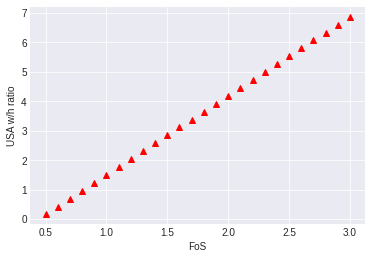

In [ ]:
P = float(input("Pillar Load in MPa (hint : 9) : "))
FoS_max = float(input("Maximum FoS Limit (hint : 3) : "))
FoS_min = float(input("Minimum FoS Limit (hint : 0.5) : "))
interval = float(input("Interval of FoS to calculate (hint : 0.1) : "))

FoS_Range(P=P, FoS_max=FoS_max, FoS_min= FoS_min, interval= interval, formula=[PillarSt_Mark],name= "USA w/h ratio")

Pillar Load in MPa (hint : 9) : 9
Maximum FoS Limit (hint : 3) : 3
Minimum FoS Limit (hint : 0.5) : 0.5
Interval of FoS to calculate (hint : 0.1) : 0.1
Maximum FoS Limit (hint : 6) : 6
Minimum FoS Limit (hint : 0.5) : 0.5
       FoS           USA w/h ratio  
------------------ -----------------
               0.7 0.695018951263915
0.7999999999999999 0.963619542185215
0.8999999999999999  1.23222013310652
0.9999999999999999  1.50082072402782
1.0999999999999999  1.76942131494912
               1.2  2.03802190587042
               1.3  2.30662249679172
1.4000000000000001  2.57522308771302
1.5000000000000002  2.84382367863432
1.6000000000000003  3.11242426955562
1.7000000000000004  3.38102486047692
1.8000000000000005  3.64962545139822
1.9000000000000006  3.91822604231952
2.0000000000000004  4.18682663324082
2.1000000000000005  4.45542722416212
2.2000000000000006  4.72402781508342
2.3000000000000007  4.99262840600472
 2.400000000000001  5.26122899692602
 2.500000000000001  5.52982958784732
 

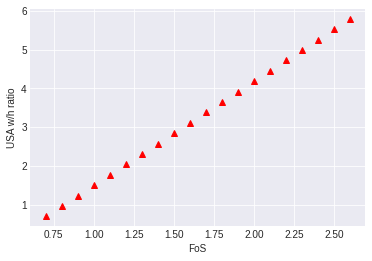

In [ ]:
P = float(input("Pillar Load in MPa (hint : 9) : "))
FoS_max = float(input("Maximum FoS Limit (hint : 3) : "))
FoS_min = float(input("Minimum FoS Limit (hint : 0.5) : "))
interval = float(input("Interval of FoS to calculate (hint : 0.1) : "))
wh_max = float(input("Maximum FoS Limit (hint : 6) : "))
wh_min = float(input("Minimum FoS Limit (hint : 0.5) : "))

a,b,c=FoS_wh_Range(P=P, FoS_max=FoS_max, FoS_min= FoS_min, interval= interval, wh_max=wh_max, wh_min= wh_min, 
                   formula=[PillarSt_Mark],name= "USA w/h ratio")

Pillar Load in MPa (hint : 9) : 9
Maximum FoS Limit (hint : 3) : 3
Minimum FoS Limit (hint : 0.5) : 0.5
Interval of FoS to calculate (hint : 0.1) : 0.1
Maximum FoS Limit (hint : 3) : 3
Minimum FoS Limit (hint : 0.5) : 0.5
       FoS           AUS w/h ratio  
------------------ -----------------
               0.6 0.717978561716999
               0.7  1.00565275750016
0.7999999999999999  1.25310129810814
0.8999999999999999  1.47358971182123
0.9999999999999999  1.67438249589275
1.0999999999999999  1.85997058413909
               1.2  2.03336022215367
               1.3  2.19668089933741
1.4000000000000001  2.35150636589367
1.5000000000000002  2.49903869052291
1.6000000000000003  2.64022065162171
1.7000000000000004  2.77580787623991
1.8000000000000005  2.90641705848883


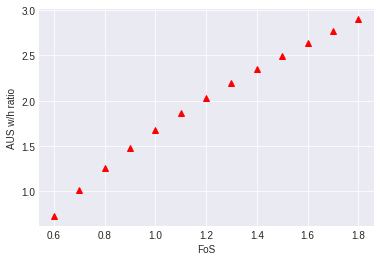

In [ ]:
P = float(input("Pillar Load in MPa (hint : 9) : "))
FoS_max = float(input("Maximum FoS Limit (hint : 3) : "))
FoS_min = float(input("Minimum FoS Limit (hint : 0.5) : "))
interval = float(input("Interval of FoS to calculate (hint : 0.1) : "))
wh_max = float(input("Maximum FoS Limit (hint : 3) : "))
wh_min = float(input("Minimum FoS Limit (hint : 0.5) : "))


d,e,f=FoS_wh_Range(P=P, FoS_max=FoS_max, FoS_min= FoS_min, interval= interval, wh_max=wh_max, wh_min= wh_min,
                   formula=[PillarSt_CSIRO],name= "AUS w/h ratio")

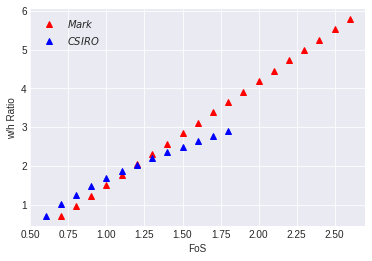

In [ ]:
plt.plot(b,c,'r^',label='$Mark$')
plt.plot(e,f,'b^',label='$CSIRO$')
plt.xlabel('FoS')
plt.ylabel('w/h Ratio')
plt.legend()
plt.show()

Width of Gallery in meter (hint: 4.8) : 4.8
Average Density of roof in Ton/m^3 (hint: 2.16) : 2.16
RMR (hint: 52.4) :52.4
Number of bolts in one row (hint: 4) : 4
Maximum Spacing in between bolts in m (hint: 1.5) : 1.5
Minimum Spacing in between bolts in m (hint: 1.2) : 1.2
Type of Bolt (hint:'QSC') : QSC
Number of Random Samples to check (>50): 300


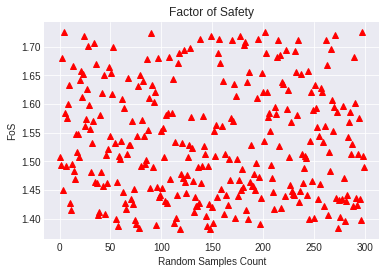

Maximum : 1.7261879087936123
Minimum : 1.3814859734260314
Mean : 1.5348010185514067
50th percentile :  1.518750852630515
25th percentile :  1.4497649489360462
75th percentile :  1.6126311321828006
97.5 percentile :  1.716014139506253
2.5 percentile :  1.3905463720806346


In [ ]:
def roof_bolting(gallery_width,avg_density,RMR,bolts, spacing_max,spacing_min,bolt_type,ran_num):
  ran = np.random.random(ran_num)
  spacing=[]
  for i in range(len(ran)):
    interval= ran[i] * (spacing_max - spacing_min)
    spacing.append(interval+spacing_min)
  spacing=np.asarray(spacing)
  roof_load = gallery_width * avg_density* (1.7 - 0.037*RMR + 0.0002*RMR*RMR)
  if bolt_type== 'QSC':
    load_bearing = 8
  FoS = bolts* load_bearing / (roof_load*gallery_width*spacing)
  x=np.array(range(0, len(FoS)))
  plt.title("Factor of Safety")
  plt.xlabel("Random Samples Count")
  plt.ylabel("FoS")
  #plt.plot(x, FoS, color = "red", marker = "r^")
  plt.style.use('seaborn-darkgrid')
  plt.plot(x, FoS,'r^')
  #plt.axhline(y=threshold, xmin=FoS.min(), xmax=FoS.max())
  #plt.legend()
  plt.show()
  print("Maximum :",FoS.max())
  print("Minimum :",FoS.min())
  print("Mean :",FoS.mean())
  print("50th percentile : ",
       np.percentile(FoS, 50))
  print("25th percentile : ",
       np.percentile(FoS, 25))
  print("75th percentile : ",
       np.percentile(FoS, 75))
  print("97.5 percentile : ",
       np.percentile(FoS, 97.5))
  print("2.5 percentile : ",
       np.percentile(FoS, 2.5))

gallery_width = float(input("Width of Gallery in meter (hint: 4.8) : "))
avg_density = float(input("Average Density of roof in Ton/m^3 (hint: 2.16) : "))
RMR = float(input("RMR (hint: 52.4) :"))
bolts = float(input("Number of bolts in one row (hint: 4) : "))  
spacing_max = float(input("Maximum Spacing in between bolts in m (hint: 1.5) : "))  
spacing_min = float(input("Minimum Spacing in between bolts in m (hint: 1.2) : "))  
bolt_type = str(input("Type of Bolt (hint:'QSC') : "))
ran_num = int(input("Number of Random Samples to check (>50): "))

roof_bolting(gallery_width, avg_density, RMR, bolts, spacing_max, spacing_min, bolt_type, ran_num)

Old Lead Distance in meter (hint: 15) : 15
New Lead Distance in meter (hint: 30) : 30
Cycle Time = Production per round of blasting /  Bucket Size (hint: 22) :22
Maximum Speed of SDL in m/min (hint: 35) : 35
Minimum Speed of SDL in m/min (hint: 15) : 15
Number of rounds of blasting in one shift (hint: 3) : 3
Number of Random Samples to check (>50): 300


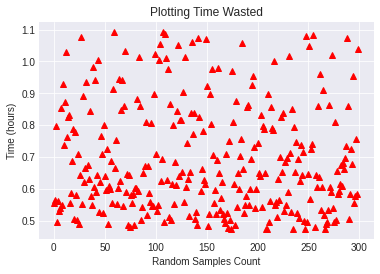

Maximum : 1.0933185246981318
Minimum : 0.4723579000368726
Mean : 0.693945688933693
50th percentile :  0.6456541574469243
25th percentile :  0.5538872975989656
75th percentile :  0.8120480845384676
97.5 percentile :  1.0712442035588026
2.5 percentile :  0.47985530804090615


In [ ]:

def lead_distance_time_wasted_saved(lead_distance_old, lead_distance_new, cycle_time,
                                    speed_max, speed_min, number_of_rounds, ran_num):
  if lead_distance_new>lead_distance_old:
    extra_distance = lead_distance_new - lead_distance_old
    time = True
  else:
    extra_distance = lead_distance_old - lead_distance_new
    time= False
  ran = np.random.random(ran_num)
  speed=[]
  for i in range(len(ran)):
    interval= ran[i] * (speed_max - speed_min)
    speed.append(interval+speed_min)
  speed=np.asarray(speed)
  time_waste= cycle_time* extra_distance/speed
  time_waste= time_waste*number_of_rounds
  time_waste=time_waste/60
  x=np.array(range(0, len(time_waste)))
  if time == True:
    time1 = 'Plotting Time Wasted'
  else:
    time1 = 'Plotting Time Saved'
  plt.title(time1)
  plt.xlabel("Random Samples Count")
  plt.ylabel("Time (hours)")
  plt.style.use('seaborn-darkgrid')
  plt.plot(x, time_waste,'r^')
  #plt.legend()
  plt.show()
  print("Maximum :",time_waste.max())
  print("Minimum :",time_waste.min())
  print("Mean :",time_waste.mean())
  print("50th percentile : ",
       np.percentile(time_waste, 50))
  print("25th percentile : ",
       np.percentile(time_waste, 25))
  print("75th percentile : ",
       np.percentile(time_waste, 75))
  print("97.5 percentile : ",
       np.percentile(time_waste, 97.5))
  print("2.5 percentile : ",
       np.percentile(time_waste, 2.5))

lead_distance_old = float(input("Old Lead Distance in meter (hint: 15) : "))
lead_distance_new = float(input("New Lead Distance in meter (hint: 30) : "))
cycle_time = float(input("Cycle Time = Production per round of blasting /  Bucket Size (hint: 22) :"))
speed_max = float(input("Maximum Speed of SDL in m/min (hint: 35) : "))  
speed_min = float(input("Minimum Speed of SDL in m/min (hint: 15) : "))  
number_of_rounds = float(input("Number of rounds of blasting in one shift (hint: 3) : "))
ran_num = int(input("Number of Random Samples to check (>50): "))

lead_distance_time_wasted_saved(lead_distance_old, lead_distance_new, cycle_time,
                                    speed_max, speed_min, number_of_rounds, ran_num)

Old Lead Distance in meter (hint: 30) : 30
New Lead Distance in meter (hint: 15) : 15
Cycle Time = Production per round of blasting /  Bucket Size (hint: 22) :22
Maximum Speed of SDL in m/min (hint: 35) : 35
Minimum Speed of SDL in m/min (hint: 15) : 15
Number of rounds of blasting in one shift (hint: 3) : 3
Number of Random Samples to check (>50): 300


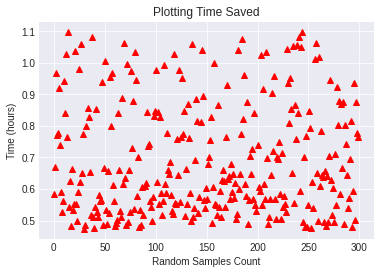

Maximum : 1.0984746669312664
Minimum : 0.4719203723534447
Mean : 0.6944137245138716
50th percentile :  0.6436999827350033
25th percentile :  0.5497209858533384
75th percentile :  0.829746620221798
97.5 percentile :  1.059693217122386
2.5 percentile :  0.4835163436152147


In [ ]:

lead_distance_old = float(input("Old Lead Distance in meter (hint: 30) : "))
lead_distance_new = float(input("New Lead Distance in meter (hint: 15) : "))
cycle_time = float(input("Cycle Time = Production per round of blasting /  Bucket Size (hint: 22) :"))
speed_max = float(input("Maximum Speed of SDL in m/min (hint: 35) : "))  
speed_min = float(input("Minimum Speed of SDL in m/min (hint: 15) : "))  
number_of_rounds = float(input("Number of rounds of blasting in one shift (hint: 3) : "))
ran_num = int(input("Number of Random Samples to check (>50): "))

lead_distance_time_wasted_saved(lead_distance_old, lead_distance_new, cycle_time,
                                    speed_max, speed_min, number_of_rounds, ran_num)

Maximum Weight in kg (hint: 90) : 90
Minimum Weight in kg (hint: 55) : 55
Maximum Height in cm (hint: 180) :180
Minimum Height in cm (hint: 150) : 150
Number of Random Samples to check (>50): 300


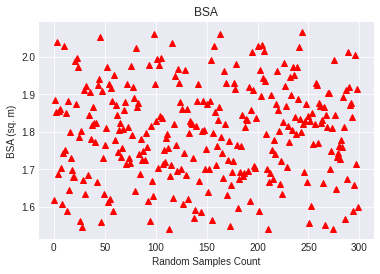

Maximum : 2.066645379402821
Minimum : 1.540443117304414
Mean : 1.799367393470316
50th percentile :  1.8072048307321364
25th percentile :  1.7023849328253544
75th percentile :  1.8840201899228446
97.5 percentile :  2.029090385480339
2.5 percentile :  1.5621021046198635


In [ ]:

def BSA_experiment(weight_max, weight_min, height_max, height_min, ran_num):
  ran = np.random.random(ran_num)
  weight=[]
  for i in range(len(ran)):
    interval= ran[i] * (weight_max - weight_min)
    weight.append(interval+weight_min)
  weight=np.asarray(weight)

  ran = np.random.random(ran_num)
  height=[]
  for i in range(len(ran)):
    interval= ran[i] * (height_max - height_min)
    height.append(interval+height_min)
  height=np.asarray(height)
  BSA = 0.007184 * (np.power(weight,0.425)) * (np.power(height,0.725))
  #print(BSA)
  x=np.array(range(0, len(BSA)))
  plt.title("BSA")
  plt.xlabel("Random Samples Count")
  plt.ylabel("BSA (sq. m)")
  plt.style.use('seaborn-darkgrid')
  plt.plot(x, BSA,'r^')
  #plt.legend()
  plt.show()
  print("Maximum :",BSA.max())
  print("Minimum :",BSA.min())
  print("Mean :",BSA.mean())
  print("50th percentile : ",
       np.percentile(BSA, 50))
  print("25th percentile : ",
       np.percentile(BSA, 25))
  print("75th percentile : ",
       np.percentile(BSA, 75))
  print("97.5 percentile : ",
       np.percentile(BSA, 97.5))
  print("2.5 percentile : ",
       np.percentile(BSA, 2.5))
  
weight_max = float(input("Maximum Weight in kg (hint: 90) : "))
weight_min = float(input("Minimum Weight in kg (hint: 55) : "))
height_max = float(input("Maximum Height in cm (hint: 180) :"))
height_min = float(input("Minimum Height in cm (hint: 150) : "))
ran_num = int(input("Number of Random Samples to check (>50): "))

BSA = BSA_experiment(weight_max, weight_min, height_max, height_min, ran_num)